In [1]:
import numpy as np
import pandas as pd
from tools.get_data.get_data_h5 import *
from pandasgui import show
import talib as ta
import datetime
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import roll_time_series


### 1. 获取原始数据

In [2]:
data =get_data(symbol= "IC99",start=20200620,freq="minbar",type="future",source_dir="Y:/DataBase_RQ_files/")
# data删除原来的index,重置index
data = data.reset_index(drop=True)
# show(data.head(1000))

Loading Completed,there are 164160 rows in IC99


### 2. 数据预处理

In [3]:
from importlib import reload
import factors as dl
reload(dl)


<module 'factors' from 'e:\\Work\\5 Research\\factor_analysis\\factors.py'>

In [4]:

data["sma_diff_5"] = dl.sma_diff(data, 5)
data["sma_diff_60"] = dl.sma_diff(data, 60)
data["ema_diff_10"] = dl.ema_diff(data, 10)
data["ema_diff_60"] = dl.ema_diff(data, 60)
data["sma_of_sma_5_5"] = dl.sma_of_sma(data, 5, 5)
data["ema_of_ema_5_5"] = dl.ema_of_ema(data, 5, 5)
data["high_30"] = dl.high(data, 30)
data["low_30"] = dl.low(data, 30)
data["high_60"] = dl.high(data, 60)
data["low_60"] = dl.low(data, 60)
data["wl_30"] = dl.wl(data, 30)
data["wl_60"] = dl.wl(data, 60)
data["macd_dif"], data["macd_dea"], data["macd_hist"], data["macd_signal"] = dl.MACD(
    data, fast=10, slow=60, mid=15)
data["slope"] = dl.slope(data, 60)
data["rsi"] = dl.rsi(data, 60)
data["sar"] = dl.sar(data)

data["long_liqka"] = dl.long_liqka(data)
data["short_liqka"] = dl.short_liqka(data)


In [5]:
data.to_csv("test_dl.csv",encoding="gbk")

In [6]:
a = dl.long_liqka(data.head(1000))
data =data.head(1000)
data["long_liqka"] = a
# 胜率
win = data.long_liqka[data.long_liqka >= 0].count()
loss = data.long_liqka[data.long_liqka < 0].count()
win_rate = win/(win+loss)
#总收益
mean_rtn = data.long_liqka.mean()
long_accu_return = data.long_liqka.cumsum()
print("win_rate",round(win_rate,2),"win",win,"loss",loss,"total",win+loss)
print("mean_rtn", round(mean_rtn, 5))


win_rate 0.51 win 512 loss 488 total 1000
mean_rtn 0.00317


C:\Users\Kyle\AppData\Local\Temp\ipykernel_7340\1178625879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["long_liqka"] = a


In [7]:
b =dl.short_liqka(data.head(1000))
data["short_liqka"] = b
win = data.short_liqka[data.short_liqka >= 0].count()
loss = data.short_liqka[data.short_liqka < 0].count()
win_rate = win/(win+loss)
mean_rtn= data.short_liqka.mean()
short_accu_return = data.short_liqka.cumsum()
print("win_rate",round(win_rate,2),"win",win,"loss",loss,"total",win+loss)
print("mean_rtn", round(mean_rtn, 5))

win_rate 0.02 win 22 loss 978 total 1000
mean_rtn -0.65416


C:\Users\Kyle\AppData\Local\Temp\ipykernel_7340\4079771981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["short_liqka"] = b


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


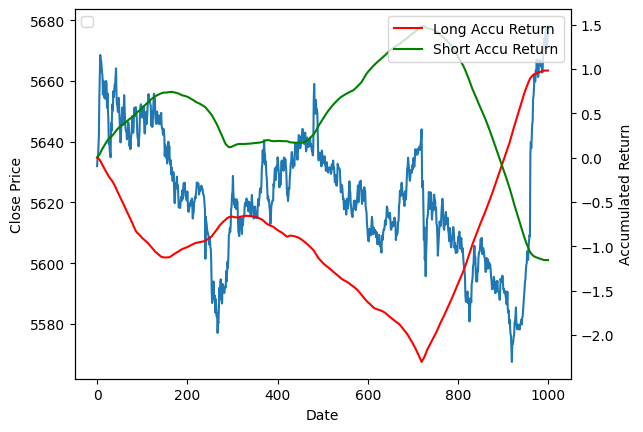

In [8]:
# 画出data.close,long_accu_return,short_accu_return,其中long_accu_return,short_accu_return共用一个y轴,data.close用另外一个y轴
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# plot data.close on first y-axis
ax1.plot(data.close)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')

# create a second y-axis for long_accu_return and short_accu_return
ax2 = ax1.twinx()

# plot long_accu_return and short_accu_return on second y-axis
ax2.plot(long_accu_return, color='red', label='Long Accu Return')
ax2.plot(short_accu_return, color='green', label='Short Accu Return')
ax2.set_ylabel('Accumulated Return')

# add legend to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [ ]:
from importlib import reload
import deep_learn as dl
reload(dl)

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.plot(data.close, color="blue")
ax1.set_ylabel("close", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax2 = ax1.twinx()
ax2.plot(long_accu_return, color="red")
ax2.set_ylabel("long_accu_return", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax3 = ax1.twinx()
ax3.plot(short_accu_return, color="green")
# ax3与ax2的y轴重合
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylabel("short_accu_return", color="green")
ax3.tick_params(axis="y", labelcolor="green")

plt.show()


In [ ]:
for i in range(1,10):
    for j in range(1,10):
        print(i)
        if j>=i:
            break

In [ ]:
data["sar/close"] =dl.sar(data).shift(-2)

# show(data[["high","low","close","sar"]])
# 画出data.sar,high,low,close,sar/close的图 ,显示label,用plotly,其中sar/close的y轴在右边
import plotly.graph_objects as go
fig = go.Figure()
# fig.add_trace(go.Scatter(x=data.index, y=data.sar,
#                     mode='lines',
#                     name='sar'))
# fig.add_trace(go.Scatter(x=data.index, y=data.high,
#                     mode='lines',
#                     name='high'))
# fig.add_trace(go.Scatter(x=data.index, y=data.low,
#                     mode='lines',
                    # name='low'))
fig.add_trace(go.Scatter(x=data.index, y=data.close,
                    mode='lines',
                    name='close'))
fig.add_trace(go.Scatter(x=data.index, y=data["sar/close"],
                    mode='lines',
                    name='sar/close',yaxis="y2"))
fig.update_layout(
    title="sar",
    xaxis_title="Time",
    yaxis_title="Price",
    yaxis2=dict(
        title="sar/close",
        titlefont=dict(
            color="rgb(148, 103, 189)"
        ),
        tickfont=dict(
            color="rgb(148, 103, 189)"
        ),
        overlaying="y",
        side="right"
    )
)
fig.show()
